In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project

/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project


In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 3s (1,894 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [4]:
%pwd

'/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project'

In [5]:
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np
from google.colab.patches import cv2_imshow

In [6]:
# TessBaseAPI baseApi = new TessBaseAPI()
# baseApi.init(datapath, language, ocrEngineMode)
# baseApi.setPageSegMode(TessBaseAPI.PageSegMode.PSM_SINGLE_LINE)
# baseApi.setVariable(TessBaseAPI.VAR_CHAR_BLACKLIST, "!?@#$%&*()<>_-+=/:;'\"ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz")
# baseApi.setVariable(TessBaseAPI.VAR_CHAR_WHITELIST, ".,0123456789")
# baseApi.setVariable("classify_bln_numeric_mode", "1")

In [7]:
def length_from_image(img_url):
  imageOrgCp = cv2.imread(img_url)                      # 원본 이미지 불러오기
  height, width, channel = imageOrgCp.shape             # 원본 이미지 크기 저장
  center = (width//2, height//2)                        # 이미지 center값 저장
  grayCp = cv2.cvtColor(imageOrgCp, cv2.COLOR_BGR2GRAY) # 이미지 흑백으로 전환

  grayCp = cv2.bitwise_not(grayCp)          # 이미지 색반전
  threshold = 250                           # 숫자영역만 원래 0에 가까울것으로 추정되기때문에 색반전후 250 이상인값만 숫자일것으로 추정
  ret, mask = cv2.threshold(grayCp, threshold, 255, cv2.THRESH_BINARY_INV)  # threshold를 사용해 숫자영역을 제외한 나머지 부분 0으로 변환
  mask = cv2.bitwise_not(mask)              # mask영역 색 반전

  img_blurred = cv2.GaussianBlur(mask, ksize=(3, 3), sigmaX=0)  # 숫자영역중 흰색과 경계인 부분은 실제 0에 가까운값이 아니었기때문에 굉장히 얇은 실선 형태로 변환되었기때문에 가우시안 블러를 사용해 모양을 다시 살림

  img_blurred = 255-img_blurred             #
  ret, mask = cv2.threshold(img_blurred, threshold, 255, cv2.THRESH_BINARY_INV)

  mask = 255-mask
  # k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  # mask = cv2.erode(mask, k)
  cv2_imshow(mask)

  chars = pytesseract.image_to_string(mask)
  print(chars.split('\n'))
  return chars


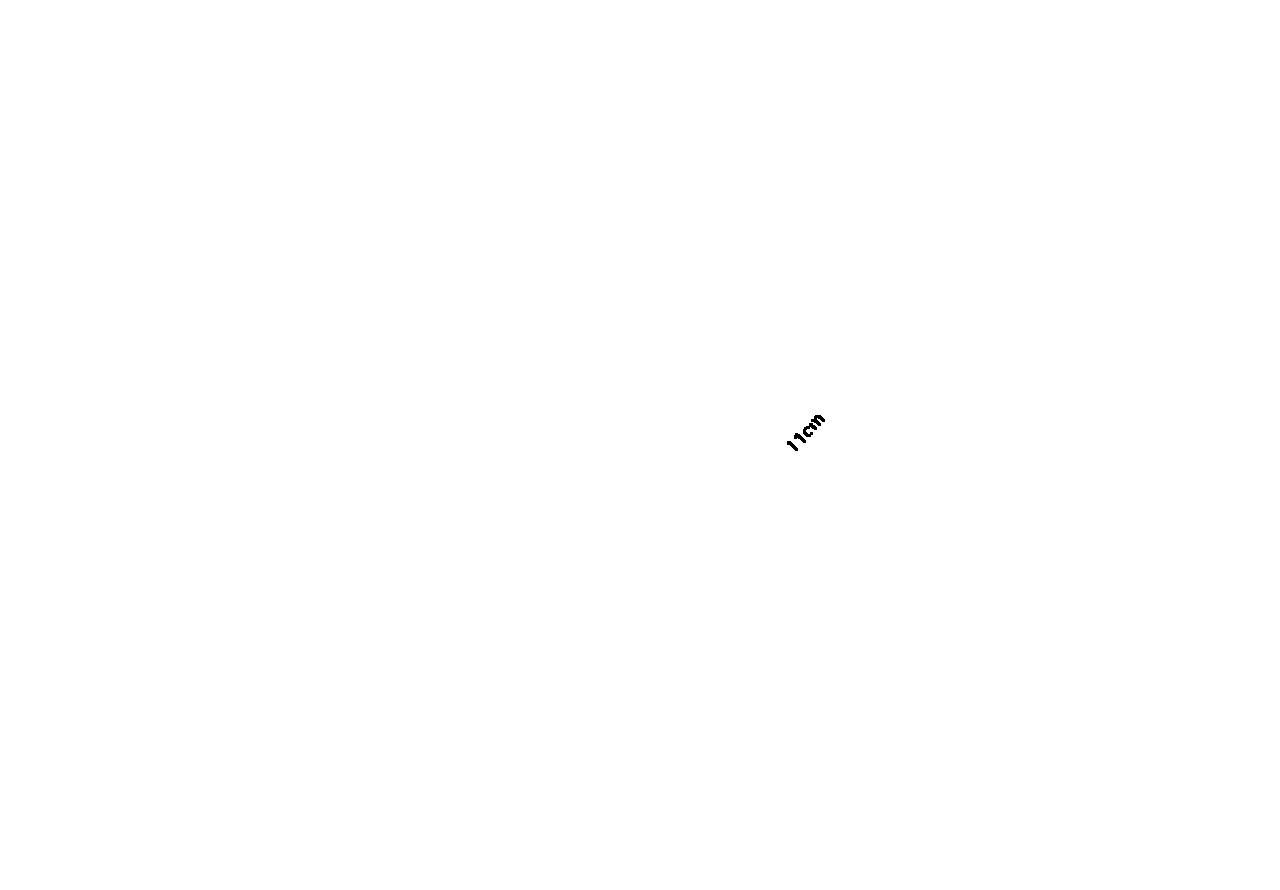

[' ', '\x0c']
 



In [8]:
# char = length_from_image("")
char = length_from_image("/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project/length/test/chilipepper_11cm_3.jpg")
print(char)

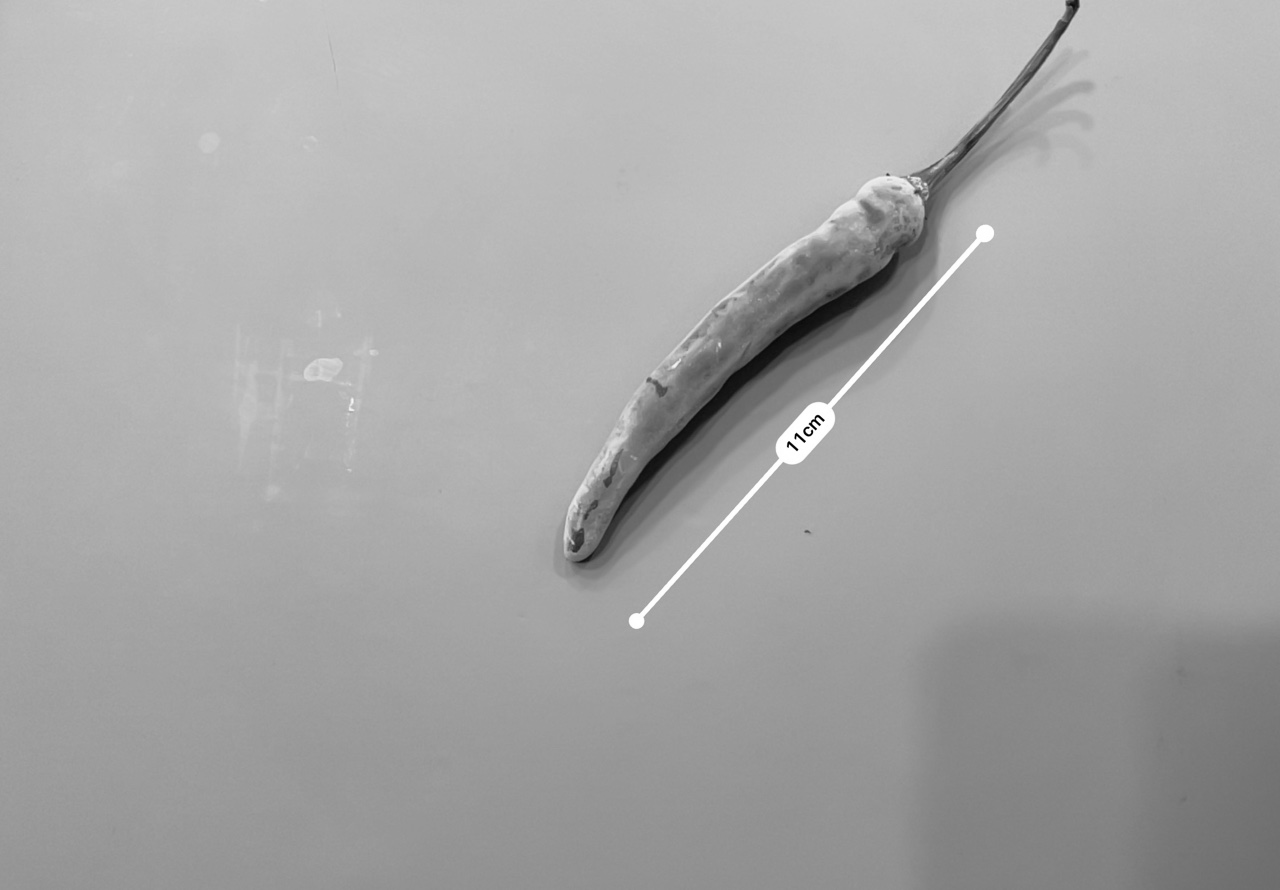

In [50]:
# imread
imageOrgCp = cv2.imread("/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project/length/test/chilipepper_11cm_3.jpg")
height, width, channel = imageOrgCp.shape
center = (width//2, height//2)

grayCp = cv2.cvtColor(imageOrgCp, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayCp)

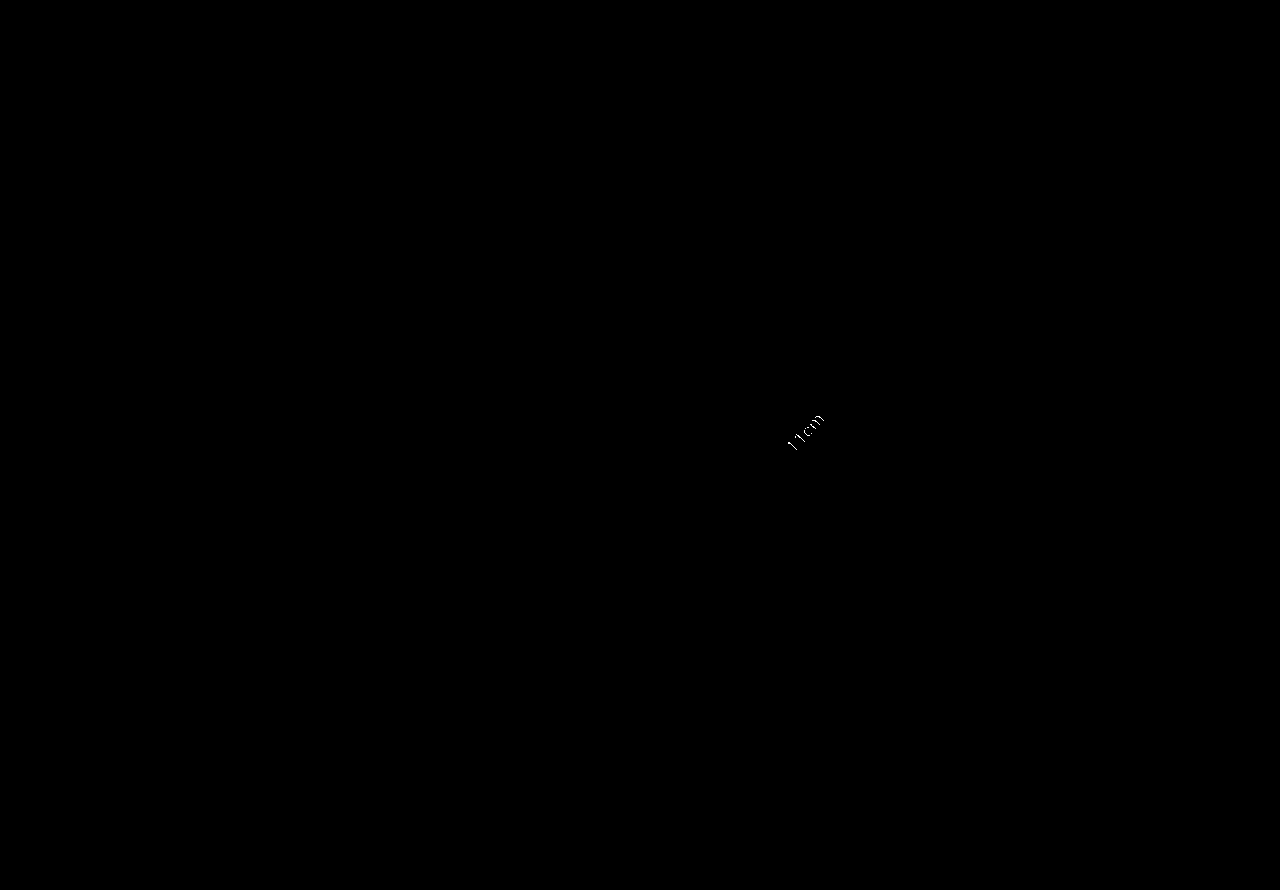

['x', '\x0c']


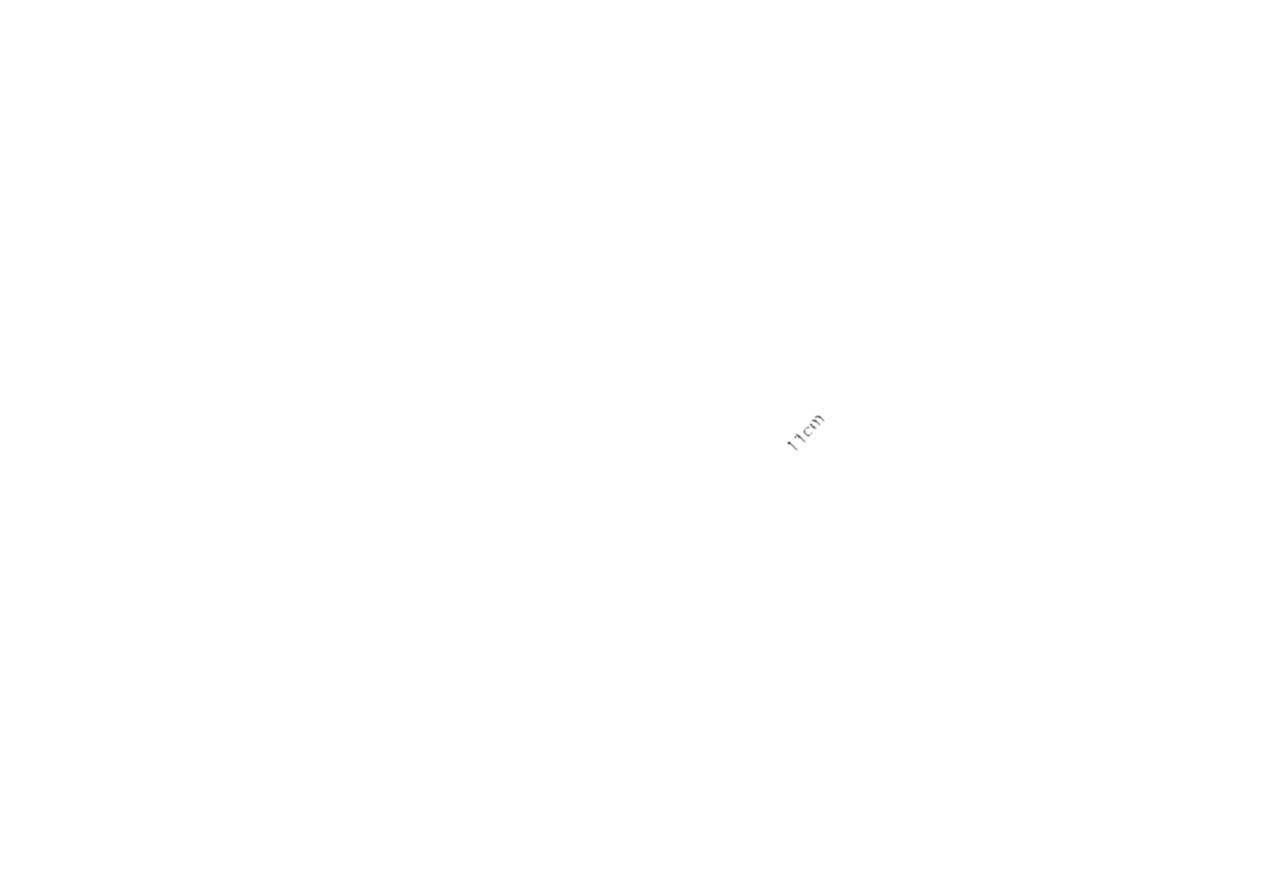

['&', 'ws', '\x0c']


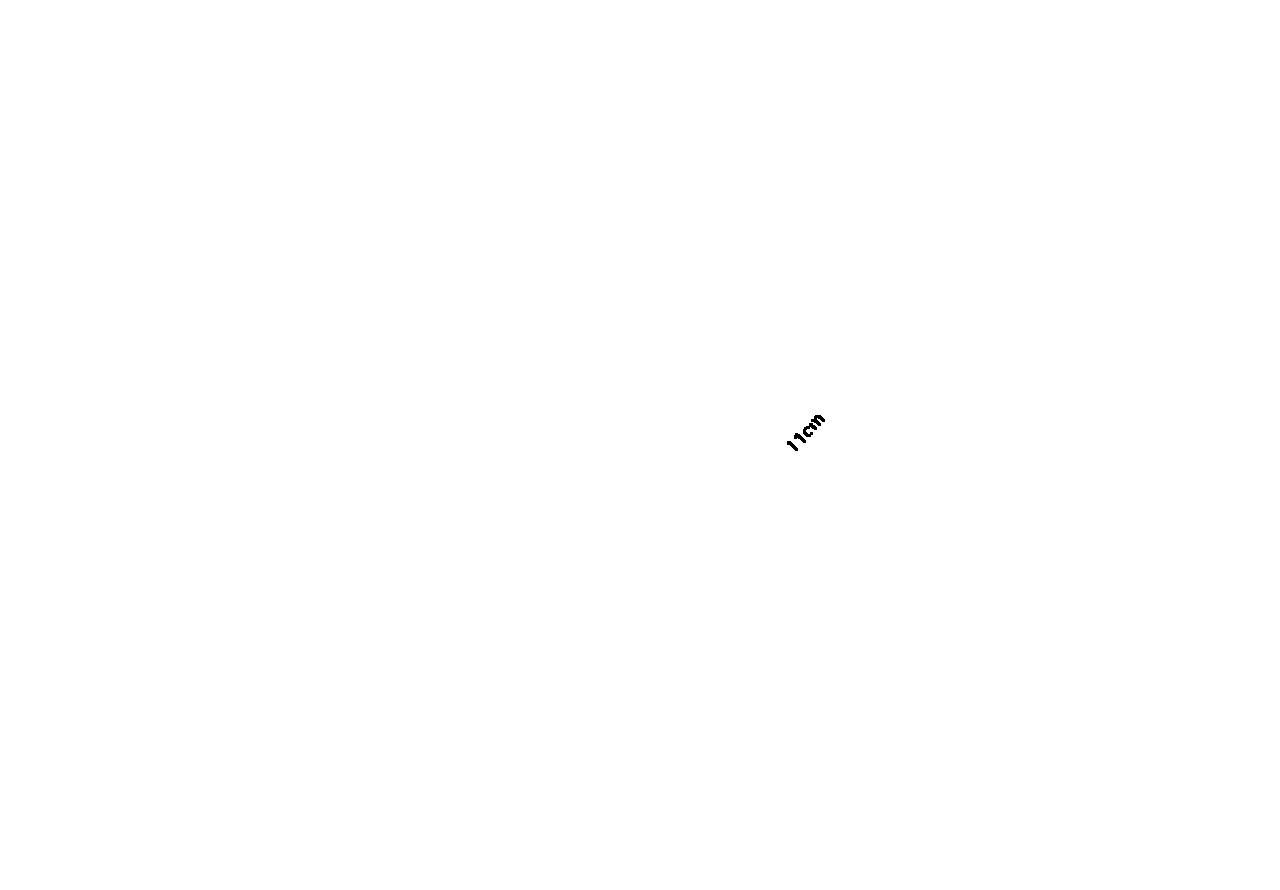

['=', 'ws', '\x0c']


In [51]:
image = grayCp
image = 255-image
threshold = 250
ret, mask = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)
mask = cv2.bitwise_not(mask)

cv2_imshow(mask)
chars = pytesseract.image_to_string(mask, config='--psm 6')
print(chars.split('\n'))

mask = 255-mask
img_blurred = cv2.GaussianBlur(mask, ksize=(3, 3), sigmaX=0)

cv2_imshow(img_blurred)
chars = pytesseract.image_to_string(img_blurred, config='--psm 6')
print(chars.split('\n'))


ret, mask = cv2.threshold(img_blurred, threshold, 255, cv2.THRESH_BINARY_INV)

mask = 255-mask
cv2_imshow(mask)
chars = pytesseract.image_to_string(mask, config='--psm 6')
print(chars.split('\n'))

In [52]:
chars = pytesseract.image_to_string(mask, config='--psm 6')
chars

'=\nws\n\x0c'

In [53]:
# M = cv2.getRotationMatrix2D(center, -40, 1.0)
# grayCp = cv2.warpAffine(grayCp, M, (width,height))
mask = 255-mask
# mask = cv2.warpAffine(mask, M, (width,height))

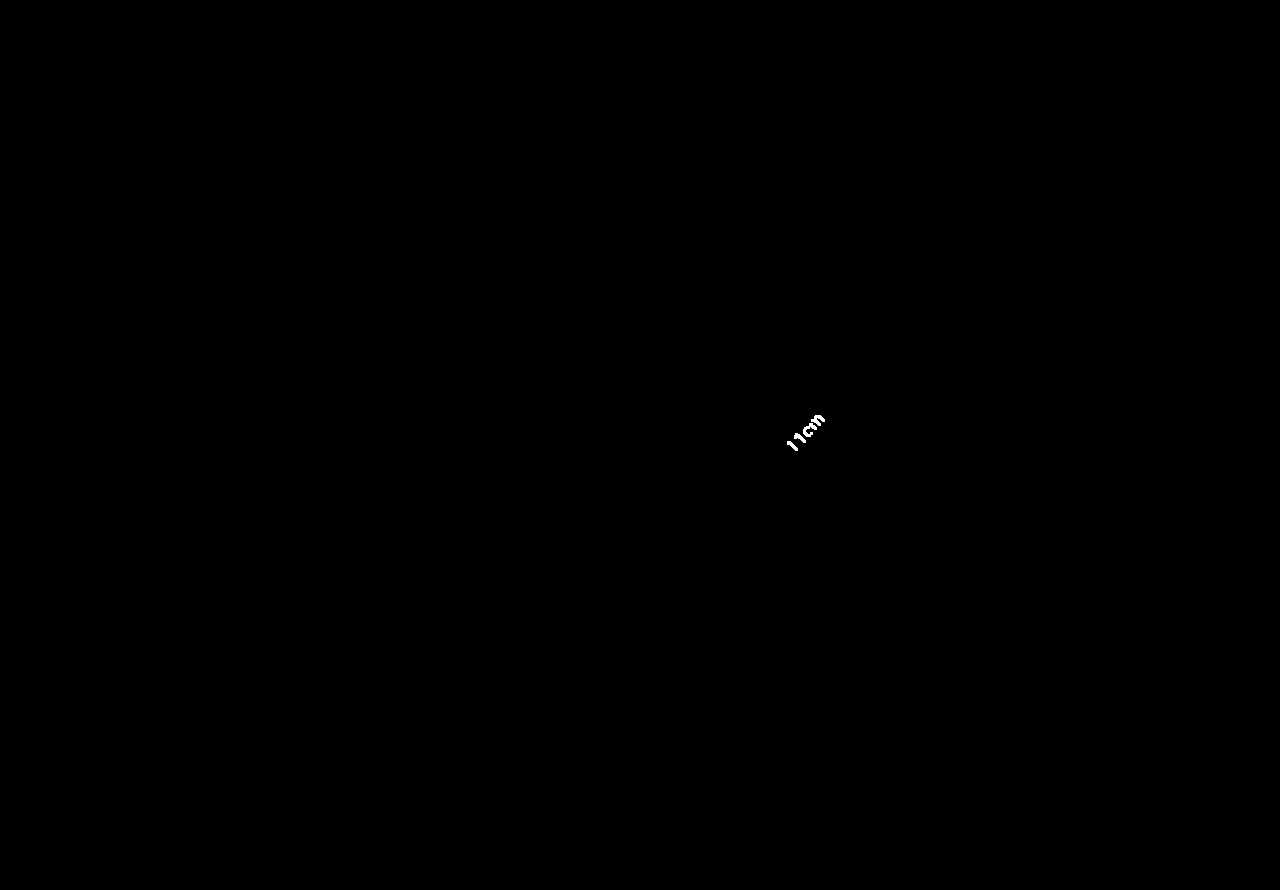

In [54]:
cv2_imshow(mask)

In [55]:
contours, _ = cv2.findContours(
    mask, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

# temp_result = np.zeros((height, width), dtype=np.uint8)

# cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=255)
# cv2_imshow(temp_result)

temp_result = np.zeros((height, width), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=255, thickness=-1)
    
    # insert to dict
    contours_dict.append({
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

In [56]:
contours_dict

[{'x': 787, 'y': 441, 'w': 11, 'h': 10, 'cx': 792.5, 'cy': 446.0},
 {'x': 794, 'y': 433, 'w': 12, 'h': 10, 'cx': 800.0, 'cy': 438.0},
 {'x': 803, 'y': 423, 'w': 14, 'h': 14, 'cx': 810.0, 'cy': 430.0},
 {'x': 811, 'y': 415, 'w': 14, 'h': 11, 'cx': 818.0, 'cy': 420.5}]

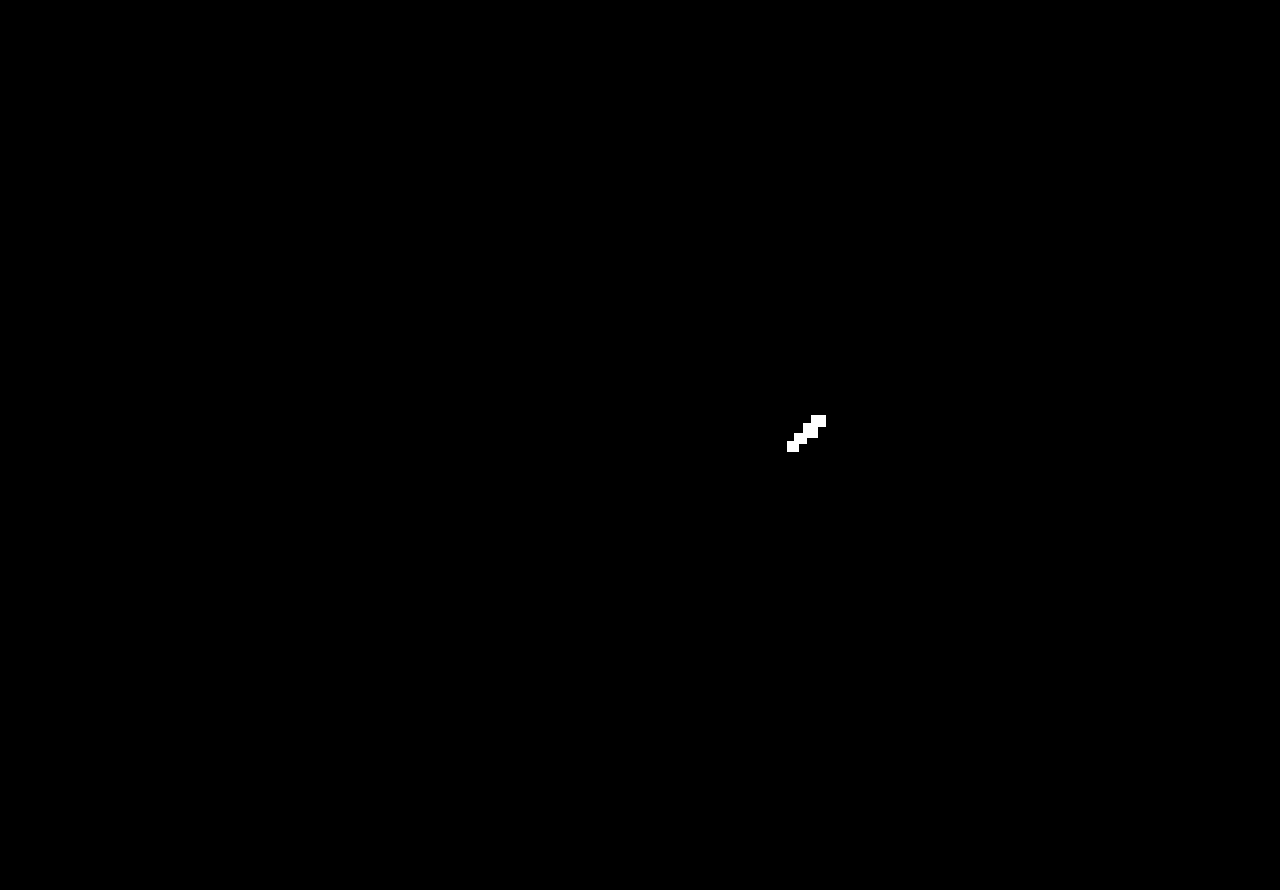

In [57]:
cv2_imshow(temp_result)

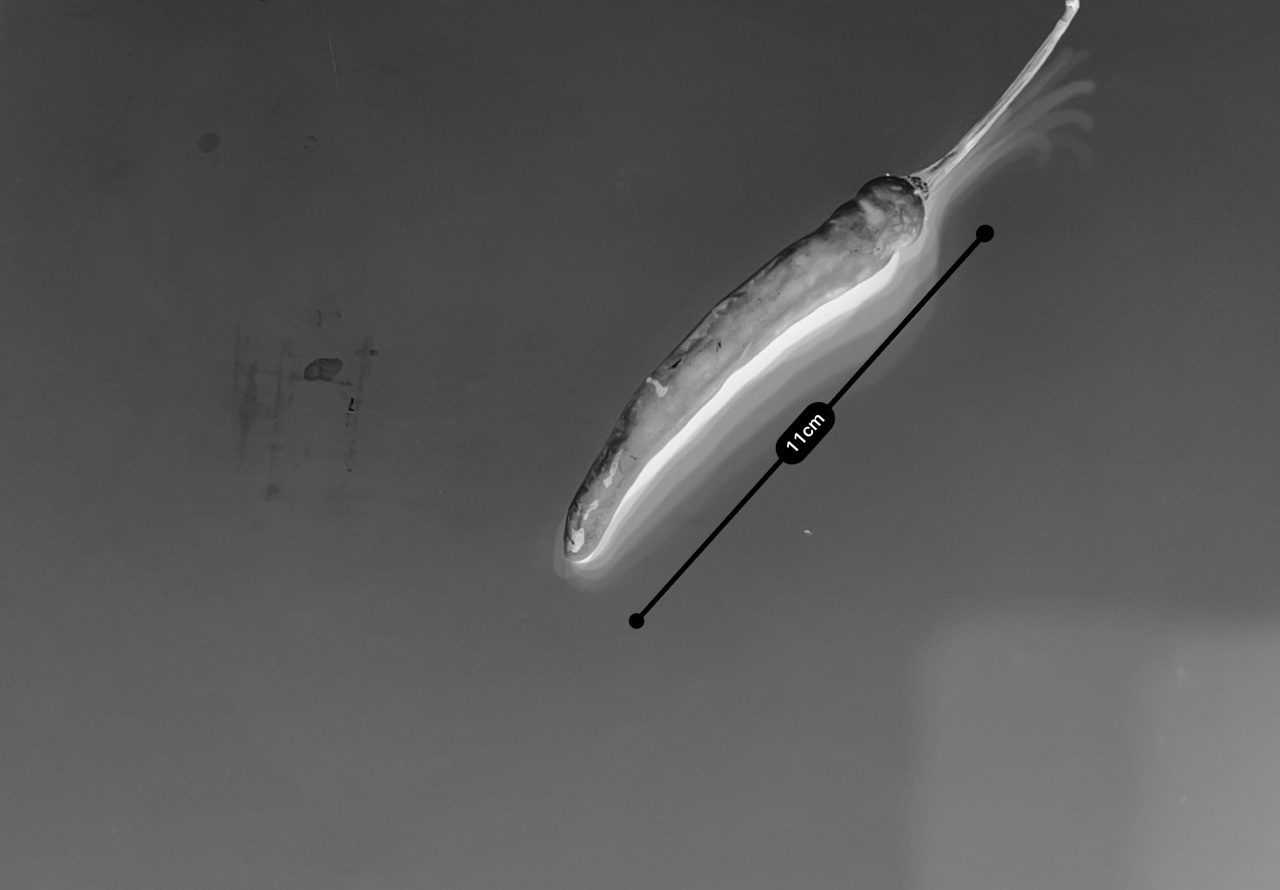

In [59]:
inv_grayCp = cv2.bitwise_not(grayCp)
cv2_imshow(inv_grayCp)

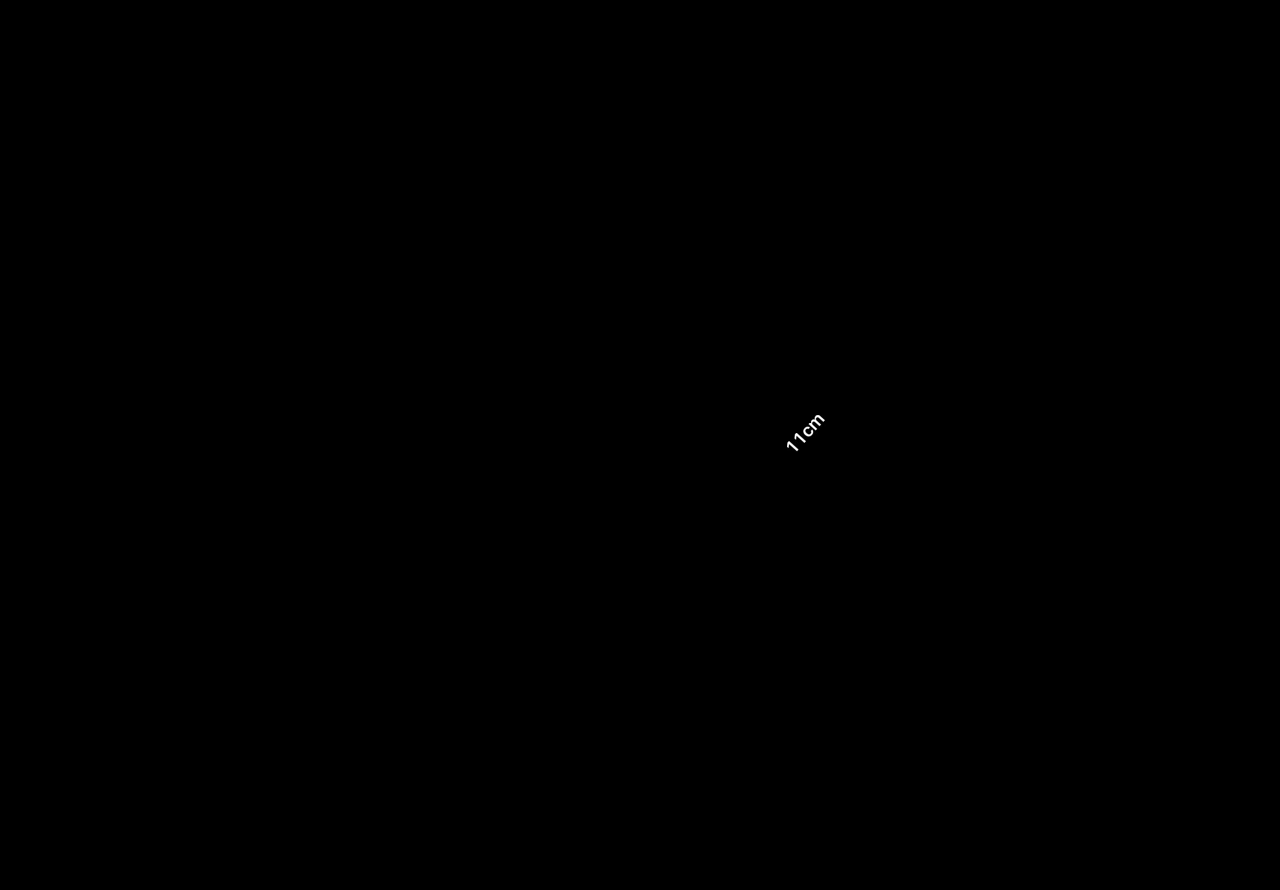

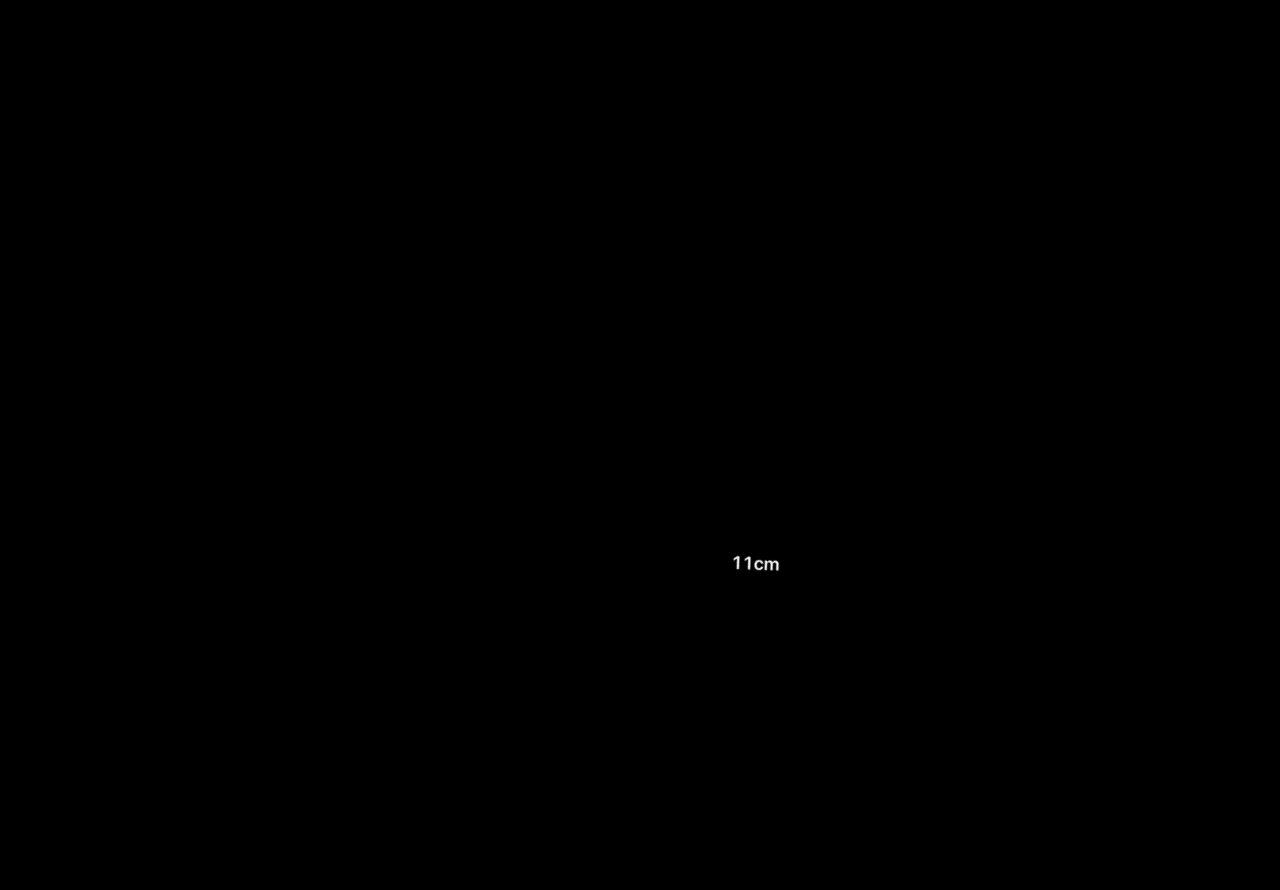

In [78]:
bit_and = cv2.bitwise_and(inv_grayCp, temp_result)
M = cv2.getRotationMatrix2D(center, -50, 1.0)
rotated = cv2.warpAffine(bit_and, M, (width,height))
cv2_imshow(bit_and)
cv2_imshow(rotated)

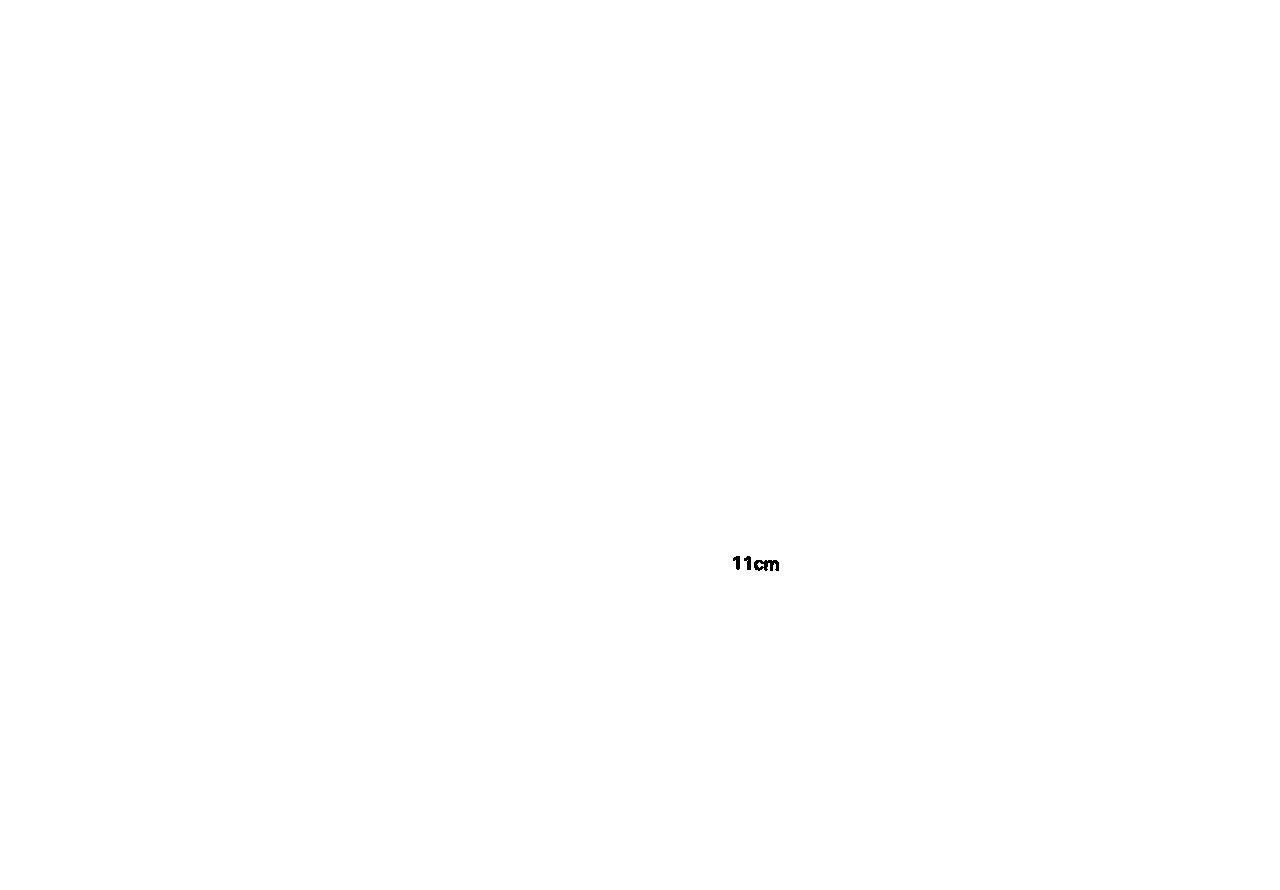

In [88]:
threshold = 30
ret, mask = cv2.threshold(rotated, threshold, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(mask)

In [91]:
chars = pytesseract.image_to_string(255-bit_and, config='--psm 6')
print(chars.split('\n'))

['SF', 'NX', '\x0c']


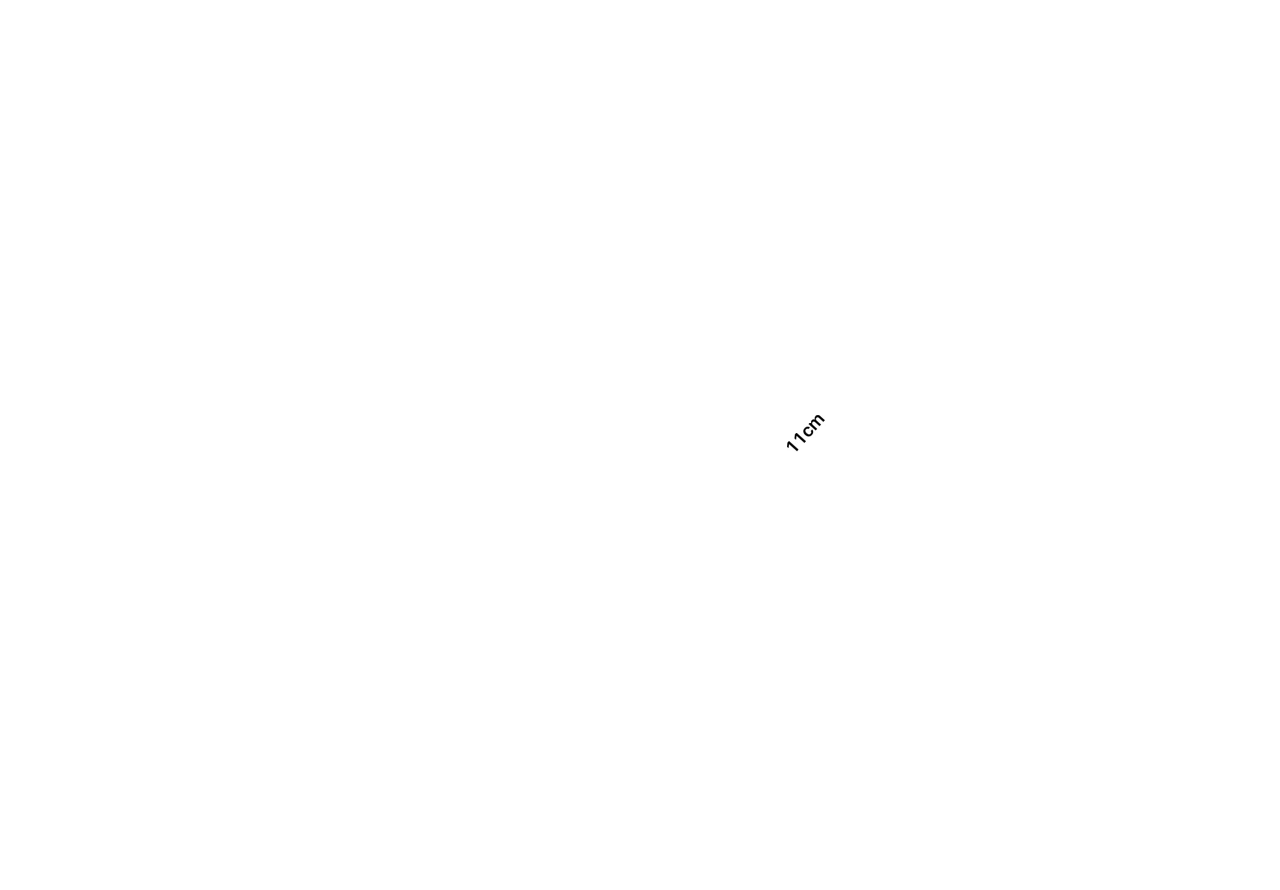

In [96]:
inv_bit_and = 255-bit_and
cv2_imshow(inv_bit_and)

In [102]:
for i in range(0, 360, 5):
  M = cv2.getRotationMatrix2D(center, i, 1.0)
  rotated = cv2.warpAffine(bit_and, M, (width,height))
  chars = pytesseract.image_to_string(255-rotated, config='--psm 6')
  print(chars.split('\n'))

['SF', 'NX', '\x0c']
['&', 's', '\x0c']
['£', 've', 'x', '\x0c']
['&', 'o', 's', '\x0c']
['&', '=', '\x0c']
['é', '\x0c']
['§', '&', '=', '\x0c']
['&§', '=', '\x0c']
['£', '2', '\x0c']
['—', 'S', '&', '=', '\x0c']
['€', '3', '&', '=', '\x0c']
['€', '3', '=', '=', '\x0c']
['&', '<', 'S', '\x0c']
['%', '2', '<', '\x0c']
['%', 'e', '4', '\x0c']
['%', '<', '\x0c']
['%', '<', '\x0c']
['%', '“', '\x0c']
['“%', '“2', '\x0c']
['Mw', '“2', '\x0c']
['Ww Ly', '\x0c']
['Moy,', '\x0c']
['May)', '\x0c']
['M94 5', '\x0c']
['wo 1', '\x0c']
['WoL L', '\x0c']
['WOLL', '\x0c']
['WOLL', '\x0c']
['woLl', '\x0c']
['word', '\x0c']
['word', '\x0c']
['yo', '\x0c']
['yew', '\x0c']
['eo', '\x0c']
['\x0c']
['»', '\x0c']
['N', '~', '2', 'Na', '\x0c']
['*', '>', '\x0c']
['~', 'S', '>', '\x0c']
['~', 'S', 's', '\x0c']
['\x0c']
['\x0c']
['=', 's', '3', '\x0c']
['-', '5', '\x0c']
['2', '3', '\x0c']
['=', 'S', '2', '3', '\x0c']
['=', 'S', '2', '3', '\x0c']
['=', '=', '3', '3', '\x0c']
['2', '3', '3', '\x0c']
['2,', '3'